In [1]:
!pip install hazm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.7/316.7 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 KB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 42.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394486 sha256=2850773cd7722529212db84ba3a3e17e2a7f1c0582fe88eb25e46347832b591b
  Stored in directory: /root/.cache/pip/wheels/19/1d/3a/0a8c14c30132b4f9ffd796efbb6746f15b3d6bcfc1055a9346
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp38-cp38-linux_x86_64.whl size=180233 sha256=6ad7f9d259aba5de12428f197a3c9febdbef98ab43133adbb23489443a7e6a56
  Stored in directory: /root/.cache/pip/wheels/3c/d8/9f/59fd78b2b7d1e9ffcb68fb6de80c2e7c20b804c8cbc4d8fc23
Successfully built nltk libwapiti
  Attempting unin

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import codecs
from hazm import *

class Loader:

    path_data = '/content/drive/My Drive/ce.sharif.edu/nlp/project/data/all.samples.out.txt'
    convert_tags_to_num = {'O': 0, 'B-علت': 1, 'I-علت': 2, 'B-معلول': 3, 'I-معلول': 4, 'B-نشانه': 5, 'I-نشانه': 6}

    def __init__(self):
        self.normalizer = Normalizer()
        self.lemmatizer = Lemmatizer()

    def create_data_label(self):
        lines = codecs.open(self.path_data, 'r', 'utf-8').readlines()

        dataset = {'tokens': [], 'tags': []}
        token_list = []
        label_list = []
        line_number = 1
        for l in lines:
            line_number += 1
            if l in ['\n']:
                if len(token_list) > 0:
                    dataset["tokens"].append(token_list)
                    dataset["tags"].append(label_list)
                    token_list = []
                    label_list = []
                continue

            l = l[0:len(l) - 1]
            w = l.split('\t')
            if len(w) != 2:
                continue

            word = w[0]
            label = w[1]
            word = self.normalizer.normalize(word)
            word = self.lemmatizer.lemmatize(word)
            token_list.append(word)
            try:
                label_list.append(self.convert_tags_to_num[label])
            except:
                label_list.append(self.convert_tags_to_num['O'])
                print(f"An exception occurred for label = {label} in line_number = {line_number}")

        return dataset


loader = Loader()
dataset = loader.create_data_label()


An exception occurred for label = IO in line_number = 134549


In [18]:
tokens = dataset['tokens']
print(f'DataSet Size = {len(tokens)}')

DataSet Size = 8810


In [8]:
dataset['tokens'][:1]

[['این',
  'مساله',
  'باعث',
  'شد#شو',
  'او',
  'را',
  'از',
  'بانفوذ',
  'اعضا',
  'جوان',
  'حزب',
  'ندا',
  'ایران',
  'در',
  'میان',
  'اصلاح',
  'طلب',
  'شناخت#شناس',
  '.']]

In [9]:
dataset['tags'][:1]

[[1, 2, 5, 0, 0, 0, 0, 3, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0]]

In [10]:
! pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 17.5 MB/s eta 0:00:00


In [11]:
from datasets import Dataset, DatasetDict
dataset_all = Dataset.from_dict(dataset)
dataset_all.shuffle()
datasets_train_test = dataset_all.train_test_split(train_size=0.8)
datasets_train_validation = datasets_train_test['train'].train_test_split(train_size=0.8)

datasets = DatasetDict({'train': datasets_train_validation['train'],
                        'validation': datasets_train_validation['test'],
                        'test': datasets_train_test['test'],
                        })
datasets

DatasetDict({
    train: Dataset({
        features: ['tokens', 'tags'],
        num_rows: 5638
    })
    validation: Dataset({
        features: ['tokens', 'tags'],
        num_rows: 1410
    })
    test: Dataset({
        features: ['tokens', 'tags'],
        num_rows: 1762
    })
})

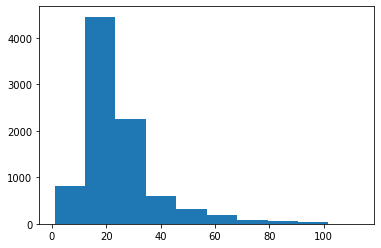

In [12]:
# Disitribution token length total dataset
import matplotlib.pyplot as plt
 
token_length_dataset_all = [len(x) for x in dataset_all["tokens"]]

plt.hist(token_length_dataset_all, bins=10)
plt.show()

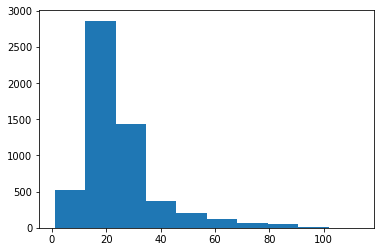

In [13]:
# Disitribution token length train dataset
import matplotlib.pyplot as plt
 
token_length_dataset_train = [len(x) for x in datasets["train"]["tokens"]]

plt.hist(token_length_dataset_train, bins=10)
plt.show()

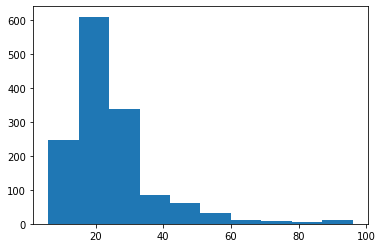

In [14]:
# Disitribution token length validation dataset
import matplotlib.pyplot as plt
 
token_length_dataset_validation = [len(x) for x in datasets["validation"]["tokens"]]

plt.hist(token_length_dataset_validation, bins=10)
plt.show()

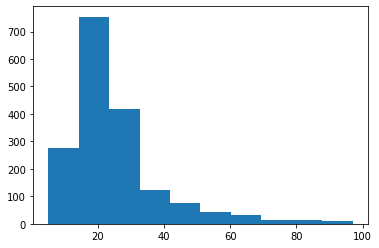

In [15]:
# Disitribution token length test dataset
import matplotlib.pyplot as plt
 
token_length_dataset_test = [len(x) for x in datasets["test"]["tokens"]]

plt.hist(token_length_dataset_test, bins=10)
plt.show()

In [16]:
!pip install transformers
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 80.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
from transformers import AutoTokenizer, BertForTokenClassification
import torch

model_name = "HooshvareLab/bert-base-parsbert-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = BertForTokenClassification.from_pretrained(model_name)

Some weights of the model checkpoint at HooshvareLab/bert-base-parsbert-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were no

In [19]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True)

    labels = []
    for i, label in enumerate(examples["tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=i)
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            # Special tokens have a word id that is None. We set the label to -100 so they are automatically
            # ignored in the loss function.
            if word_idx is None:
                label_ids.append(-100)
            # We set the label for the first token of each word.
            elif word_idx != previous_word_idx:
                label_ids.append(label[word_idx])
            # For the other tokens in a word, we set the label to either the current label or -100, depending on
            # the label_all_tokens flag.
            else:
                label_ids.append(label[word_idx] if label_all_tokens else -100)
            previous_word_idx = word_idx

        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

In [20]:
label_all_tokens = True
tokenized_datasets = datasets.map(tokenize_and_align_labels, batched=True)

Map:   0%|          | 0/5638 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/1410 [00:00<?, ? examples/s]

Map:   0%|          | 0/1762 [00:00<?, ? examples/s]

In [21]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer)

In [23]:
from transformers import BertForTokenClassification, TrainingArguments, Trainer

model = BertForTokenClassification.from_pretrained(model_name, num_labels=7) # 'O', 'B-CAUSE', 'I-CAUSE', 'B-EFFECT', 'I-EFFECT', 'B-Marker', 'I-Marker'

Some weights of the model checkpoint at HooshvareLab/bert-base-parsbert-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were no

In [34]:
args = TrainingArguments(
    'cause-effect-training',
    evaluation_strategy = 'epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    weight_decay=0.01,
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [25]:
!pip install seqeval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16179 sha256=bdadfb8b8cc1408ed9bb059e37e6672b4a91fdd5c2f365415f2e70a535078e45
  Stored in directory: /root/.cache/pip/wheels/ad/5c/ba/05fa33fa5855777b7d686e843ec07452f22a66a138e290e732
Successfully built seqeval


In [26]:
from datasets import load_metric
metric = load_metric("seqeval")

<ipython-input-26-b45dd5e34816>:2: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("seqeval")


In [27]:
label_list = ['O', 'B-CAUSE', 'I-CAUSE', 'B-EFFECT', 'I-EFFECT', 'B-Marker', 'I-Marker']

In [28]:
import numpy as np

def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    # Remove ignored index (special tokens)
    true_predictions = [
        [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = metric.compute(predictions=true_predictions, references=true_labels)
    return {
        "precision": results["overall_precision"],
        "recall": results["overall_recall"],
        "f1": results["overall_f1"],
        "accuracy": results["overall_accuracy"],
    }

In [35]:
trainer = Trainer(
    model,
    args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [36]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `BertForTokenClassification.forward` and have been ignored: tokens, tags. If tokens, tags are not expected by `BertForTokenClassification.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 5638
  Num Epochs = 1
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 353
  Number of trainable parameters = 162256135


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,0.557964,0.495077,0.563071,0.526890,0.795493


The following columns in the evaluation set don't have a corresponding argument in `BertForTokenClassification.forward` and have been ignored: tokens, tags. If tokens, tags are not expected by `BertForTokenClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1410
  Batch size = 16


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=353, training_loss=0.7024103872499114, metrics={'train_runtime': 5298.4797, 'train_samples_per_second': 1.064, 'train_steps_per_second': 0.067, 'total_flos': 198645548947560.0, 'train_loss': 0.7024103872499114, 'epoch': 1.0})

In [37]:
trainer.evaluate()

The following columns in the evaluation set don't have a corresponding argument in `BertForTokenClassification.forward` and have been ignored: tokens, tags. If tokens, tags are not expected by `BertForTokenClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1410
  Batch size = 16


{'eval_loss': 0.5579643249511719,
 'eval_precision': 0.49507735583684953,
 'eval_recall': 0.5630712979890311,
 'eval_f1': 0.5268897679888805,
 'eval_accuracy': 0.7954925297543682,
 'eval_runtime': 350.8148,
 'eval_samples_per_second': 4.019,
 'eval_steps_per_second': 0.254,
 'epoch': 1.0}

In [38]:
model_address = "/content/drive/My Drive/ce.sharif.edu/nlp/project/output_model-2"
trainer.save_model(model_address)
tokenizer.save_pretrained(model_address)

Saving model checkpoint to /content/drive/My Drive/ce.sharif.edu/nlp/project/output_model-2
Configuration saved in /content/drive/My Drive/ce.sharif.edu/nlp/project/output_model-2/config.json
Model weights saved in /content/drive/My Drive/ce.sharif.edu/nlp/project/output_model-2/pytorch_model.bin
tokenizer config file saved in /content/drive/My Drive/ce.sharif.edu/nlp/project/output_model-2/tokenizer_config.json
Special tokens file saved in /content/drive/My Drive/ce.sharif.edu/nlp/project/output_model-2/special_tokens_map.json
tokenizer config file saved in /content/drive/My Drive/ce.sharif.edu/nlp/project/output_model-2/tokenizer_config.json
Special tokens file saved in /content/drive/My Drive/ce.sharif.edu/nlp/project/output_model-2/special_tokens_map.json


('/content/drive/My Drive/ce.sharif.edu/nlp/project/output_model-2/tokenizer_config.json',
 '/content/drive/My Drive/ce.sharif.edu/nlp/project/output_model-2/special_tokens_map.json',
 '/content/drive/My Drive/ce.sharif.edu/nlp/project/output_model-2/vocab.txt',
 '/content/drive/My Drive/ce.sharif.edu/nlp/project/output_model-2/added_tokens.json',
 '/content/drive/My Drive/ce.sharif.edu/nlp/project/output_model-2/tokenizer.json')

In [39]:
model.save_pretrained(model_address)

Configuration saved in /content/drive/My Drive/ce.sharif.edu/nlp/project/output_model-2/config.json
Model weights saved in /content/drive/My Drive/ce.sharif.edu/nlp/project/output_model-2/pytorch_model.bin


In [40]:
predictions, labels, _ = trainer.predict(tokenized_datasets["test"])
predictions = np.argmax(predictions, axis=2)

# Remove ignored index (special tokens)
true_predictions = [
    [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(predictions, labels)
]
true_labels = [
    [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(predictions, labels)
]

results = metric.compute(predictions=true_predictions, references=true_labels)
results

The following columns in the test set don't have a corresponding argument in `BertForTokenClassification.forward` and have been ignored: tokens, tags. If tokens, tags are not expected by `BertForTokenClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1762
  Batch size = 16


{'CAUSE': {'precision': 0.41973684210526313,
  'recall': 0.5328507795100222,
  'f1': 0.46957801766437685,
  'number': 1796},
 'EFFECT': {'precision': 0.3581609195402299,
  'recall': 0.4170235546038544,
  'f1': 0.38535740786544637,
  'number': 1868},
 'Marker': {'precision': 0.7042842215256009,
  'recall': 0.7174028738690793,
  'f1': 0.710783021355128,
  'number': 1879},
 'overall_precision': 0.4842204427696656,
 'overall_recall': 0.5563774129532744,
 'overall_f1': 0.5177971793149764,
 'overall_accuracy': 0.8008426039179141}

In [41]:
import pandas as pd

In [42]:
token_lengths = []
overall_f1 = []
cause_f1 = []
effect_f1 = []


for i in range(len(true_predictions)):
  result = metric.compute(predictions=[true_predictions[i]], references=[true_labels[i]])
  if 'EFFECT' in result and 'CAUSE' in result:
    token_lengths.append(len(true_predictions[i]))
    overall_f1.append(result['overall_f1'])
    cause_f1.append(result['CAUSE']['f1'])
    effect_f1.append(result['EFFECT']['f1'])
  #print(results)

df = pd.DataFrame({'Token Length': token_lengths, 'Overall F1': overall_f1, 'F1 Cause': cause_f1, 'F1 Effect': effect_f1})
df


/usr/local/lib/python3.8/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Recall and F-score are ill-defined and 

,Token Length,Overall F1,F1 Cause,F1 Effect
0,33,0.666667,1.000000,0.000000
1,23,0.857143,1.000000,0.666667
2,23,0.857143,1.000000,1.000000
3,25,0.285714,0.666667,0.000000
4,19,0.666667,1.000000,1.000000
...,...,...,...,...
1704,32,0.285714,0.000000,0.000000
1705,30,0.250000,0.000000,1.000000
1706,17,0.666667,1.000000,1.000000
1707,31,0.571429,0.666667,0.000000


<AxesSubplot:xlabel='Token Length'>

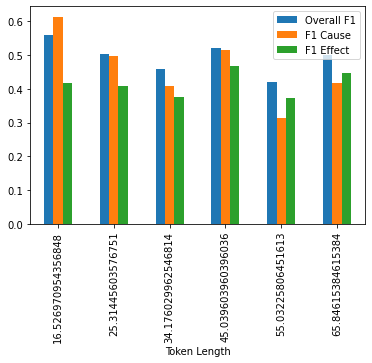

In [43]:
df.groupby(pd.cut(df["Token Length"], np.arange(10, 70+10, 10))).mean().plot.bar(x='Token Length')

In [44]:
from transformers import AutoTokenizer, AutoModelForTokenClassification

tokenizer = AutoTokenizer.from_pretrained(model_address)
model = AutoModelForTokenClassification.from_pretrained(model_address)

loading file vocab.txt
loading file tokenizer.json
loading file added_tokens.json
loading file special_tokens_map.json
loading file tokenizer_config.json
loading configuration file /content/drive/My Drive/ce.sharif.edu/nlp/project/output_model-2/config.json
Model config BertConfig {
  "_name_or_path": "/content/drive/My Drive/ce.sharif.edu/nlp/project/output_model-2",
  "architectures": [
    "BertForTokenClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5,
    "LABEL_6": 6
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,


In [46]:
label_list = ['O', 'B-CAUSE', 'I-CAUSE', 'B-EFFECT', 'I-EFFECT', 'B-Marker', 'I-Marker']

In [51]:
sequence = "به دلیل آلودگی هوا مدرسه ها تعطیل شد"

tokens = tokenizer.tokenize(tokenizer.decode(tokenizer.encode(sequence)))
inputs = tokenizer.encode(sequence, return_tensors="pt")

outputs = model(inputs).logits
predictions = torch.argmax(outputs, dim=2)

In [52]:
print([(token, label_list[prediction]) for token, prediction in zip(tokens, predictions[0].numpy())])

[('[CLS]', 'O'), ('به', 'B-Marker'), ('دلیل', 'I-Marker'), ('الودگی', 'B-CAUSE'), ('هوا', 'I-CAUSE'), ('مدرسه', 'B-EFFECT'), ('ها', 'I-EFFECT'), ('تعطیل', 'I-EFFECT'), ('شد', 'I-EFFECT'), ('[SEP]', 'O')]


In [49]:
sequence = "به دلیل دیابت درگذشت"

tokens = tokenizer.tokenize(tokenizer.decode(tokenizer.encode(sequence)))
inputs = tokenizer.encode(sequence, return_tensors="pt")

outputs = model(inputs).logits
predictions = torch.argmax(outputs, dim=2)

In [50]:
print([(token, label_list[prediction]) for token, prediction in zip(tokens, predictions[0].numpy())])

[('[CLS]', 'O'), ('به', 'B-Marker'), ('دلیل', 'I-Marker'), ('دیابت', 'B-CAUSE'), ('درگذشت', 'B-EFFECT'), ('[SEP]', 'O')]
